<a href="https://www.kaggle.com/code/alymahmoudd/house-plant-species?scriptVersionId=294663961" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

folds=('/kaggle/input/house-plant-species/house_plant_species')

labels=[]
filepaths=[]


for fold in os.listdir(folds):
    fullpath=os.path.join(folds,fold)
    for filename in os.listdir(fullpath):
        full_path=os.path.join(fullpath,filename)
        filepaths.append(full_path)
        labels.append(fold)
        
    

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2026-01-29 02:17:49.899621: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769653070.090615      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769653070.149692      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769653070.619948      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769653070.619988      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769653070.619990      24 computation_placer.cc:177] computation placer alr

In [2]:
df=pd.DataFrame(data={"filepaths":filepaths, "labels":labels})
df   

,filepaths,labels
0,/kaggle/input/house-plant-species/house_plant_...,Orchid
1,/kaggle/input/house-plant-species/house_plant_...,Orchid
2,/kaggle/input/house-plant-species/house_plant_...,Orchid
3,/kaggle/input/house-plant-species/house_plant_...,Orchid
4,/kaggle/input/house-plant-species/house_plant_...,Orchid
...,...,...
14785,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
14786,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
14787,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
14788,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)


In [3]:
df['labels'].value_counts()

labels
Monstera Deliciosa (Monstera deliciosa)       547
Dumb Cane (Dieffenbachia spp.)                541
Chinese evergreen (Aglaonema)                 514
Lilium (Hemerocallis)                         480
Anthurium (Anthurium andraeanum)              455
ZZ Plant (Zamioculcas zamiifolia)             438
Daffodils (Narcissus spp.)                    421
Lily of the valley (Convallaria majalis)      416
Prayer Plant (Maranta leuconeura)             400
Snake plant (Sanseviera)                      396
Peace lily                                    385
Chinese Money Plant (Pilea peperomioides)     382
Money Tree (Pachira aquatica)                 359
Jade plant (Crassula ovata)                   353
Ctenanthe                                     347
Tulip                                         341
Polka Dot Plant (Hypoestes phyllostachya)     341
Tradescantia                                  341
African Violet (Saintpaulia ionantha)         337
Elephant Ear (Alocasia spp.)               

In [4]:
train_df,df_to_split=train_test_split(df,test_size=0.4,random_state=42,stratify=df['labels'])


In [5]:
train_df

,filepaths,labels
3393,/kaggle/input/house-plant-species/house_plant_...,Chinese evergreen (Aglaonema)
3050,/kaggle/input/house-plant-species/house_plant_...,Sago Palm (Cycas revoluta)
1770,/kaggle/input/house-plant-species/house_plant_...,Snake plant (Sanseviera)
1320,/kaggle/input/house-plant-species/house_plant_...,Areca Palm (Dypsis lutescens)
10067,/kaggle/input/house-plant-species/house_plant_...,ZZ Plant (Zamioculcas zamiifolia)
...,...,...
4882,/kaggle/input/house-plant-species/house_plant_...,Parlor Palm (Chamaedorea elegans)
14587,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
13859,/kaggle/input/house-plant-species/house_plant_...,Tradescantia
8533,/kaggle/input/house-plant-species/house_plant_...,Lilium (Hemerocallis)


In [6]:
df_valid,df_test=train_test_split(df_to_split,test_size=0.5,random_state=42,stratify=df_to_split['labels'])
df_valid

,filepaths,labels
11532,/kaggle/input/house-plant-species/house_plant_...,Rubber Plant (Ficus elastica)
3127,/kaggle/input/house-plant-species/house_plant_...,Cast Iron Plant (Aspidistra elatior)
68,/kaggle/input/house-plant-species/house_plant_...,Orchid
7779,/kaggle/input/house-plant-species/house_plant_...,Ponytail Palm (Beaucarnea recurvata)
12690,/kaggle/input/house-plant-species/house_plant_...,Tulip
...,...,...
5587,/kaggle/input/house-plant-species/house_plant_...,Peace lily
14229,/kaggle/input/house-plant-species/house_plant_...,African Violet (Saintpaulia ionantha)
408,/kaggle/input/house-plant-species/house_plant_...,Chrysanthemum
3654,/kaggle/input/house-plant-species/house_plant_...,Chinese evergreen (Aglaonema)


In [7]:
df_test

,filepaths,labels
14184,/kaggle/input/house-plant-species/house_plant_...,African Violet (Saintpaulia ionantha)
13962,/kaggle/input/house-plant-species/house_plant_...,Tradescantia
13375,/kaggle/input/house-plant-species/house_plant_...,Anthurium (Anthurium andraeanum)
11048,/kaggle/input/house-plant-species/house_plant_...,Polka Dot Plant (Hypoestes phyllostachya)
352,/kaggle/input/house-plant-species/house_plant_...,Chrysanthemum
...,...,...
2696,/kaggle/input/house-plant-species/house_plant_...,Hyacinth (Hyacinthus orientalis)
4241,/kaggle/input/house-plant-species/house_plant_...,Daffodils (Narcissus spp.)
2435,/kaggle/input/house-plant-species/house_plant_...,Bird of Paradise (Strelitzia reginae)
14332,/kaggle/input/house-plant-species/house_plant_...,Pothos (Ivy arum)


In [8]:

df_valid['labels'].value_counts()

labels
Monstera Deliciosa (Monstera deliciosa)       110
Dumb Cane (Dieffenbachia spp.)                108
Chinese evergreen (Aglaonema)                 103
Lilium (Hemerocallis)                          96
Anthurium (Anthurium andraeanum)               91
ZZ Plant (Zamioculcas zamiifolia)              87
Daffodils (Narcissus spp.)                     84
Lily of the valley (Convallaria majalis)       83
Prayer Plant (Maranta leuconeura)              80
Snake plant (Sanseviera)                       79
Peace lily                                     77
Chinese Money Plant (Pilea peperomioides)      76
Money Tree (Pachira aquatica)                  72
Jade plant (Crassula ovata)                    71
Ctenanthe                                      70
Tradescantia                                   69
Tulip                                          68
Polka Dot Plant (Hypoestes phyllostachya)      68
African Violet (Saintpaulia ionantha)          68
Calathea                                   

In [9]:
df_test['labels'].value_counts()

labels
Monstera Deliciosa (Monstera deliciosa)       109
Dumb Cane (Dieffenbachia spp.)                108
Chinese evergreen (Aglaonema)                 103
Lilium (Hemerocallis)                          96
Anthurium (Anthurium andraeanum)               91
ZZ Plant (Zamioculcas zamiifolia)              88
Daffodils (Narcissus spp.)                     84
Lily of the valley (Convallaria majalis)       83
Prayer Plant (Maranta leuconeura)              80
Snake plant (Sanseviera)                       79
Chinese Money Plant (Pilea peperomioides)      77
Peace lily                                     77
Money Tree (Pachira aquatica)                  72
Jade plant (Crassula ovata)                    70
Ctenanthe                                      69
Tradescantia                                   68
Tulip                                          68
Polka Dot Plant (Hypoestes phyllostachya)      68
Elephant Ear (Alocasia spp.)                   67
African Violet (Saintpaulia ionantha)      

In [10]:
gen=ImageDataGenerator()

train_gen=gen.flow_from_dataframe(train_df,x_col='filepaths',y_col='labels',target_size=(224,224),
                                 class_mode='categorical',color_mode='rgb',batch_size=16
                                 ,)
valid_gen=gen.flow_from_dataframe(df_valid,x_col='filepaths',y_col='labels',target_size=(224,224),
                                 class_mode='categorical',color_mode='rgb',batch_size=16
                    )
test_gen=gen.flow_from_dataframe(df_test,x_col='filepaths',y_col='labels',target_size=(224,224),
                                class_mode='categorical',color_mode='rgb',batch_size=16
                                )

Found 8767 validated image filenames belonging to 47 classes.
Found 2937 validated image filenames belonging to 47 classes.
Found 2916 validated image filenames belonging to 47 classes.


In [11]:
early_stop=EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

model=Sequential([
    Input((224,224,3)),
    Conv2D(224,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(64,activation='relu'),
    Dropout(0.3),

    Dense(47,activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

I0000 00:00:1769653123.514821      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1769653123.518672      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 224)  │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 224)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │       258,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 373248)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    47,775,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 47)             │         3,055 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,051,631 (183.30 MB)

 Trainable params: 48,051,631 (183.30 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history=model.fit(train_gen,epochs=10,validation_data=valid_gen,callbacks=[early_stop])

Epoch 1/10


I0000 00:00:1769653128.572878      69 service.cc:152] XLA service 0x7be174004a30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1769653128.572916      69 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1769653128.572922      69 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1769653128.989589      69 cuda_dnn.cc:529] Loaded cuDNN version 91002


  1/548 ━━━━━━━━━━━━━━━━━━━━ 1:55:23 13s/step - accuracy: 0.0625 - loss: 64.0109

I0000 00:00:1769653138.979167      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


548/548 ━━━━━━━━━━━━━━━━━━━━ 419s 743ms/step - accuracy: 0.0386 - loss: 22.2935 - val_accuracy: 0.0364 - val_loss: 3.8470
Epoch 2/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 246s 449ms/step - accuracy: 0.0370 - loss: 3.8461 - val_accuracy: 0.0364 - val_loss: 3.8438
Epoch 3/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 248s 453ms/step - accuracy: 0.0331 - loss: 3.8431 - val_accuracy: 0.0364 - val_loss: 3.8407
Epoch 4/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 244s 445ms/step - accuracy: 0.0359 - loss: 3.8419 - val_accuracy: 0.0368 - val_loss: 3.8378
Epoch 5/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 245s 448ms/step - accuracy: 0.0407 - loss: 3.8363 - val_accuracy: 0.0368 - val_loss: 3.8350
Epoch 6/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 245s 447ms/step - accuracy: 0.0372 - loss: 3.8335 - val_accuracy: 0.0368 - val_loss: 3.8324
Epoch 7/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 247s 451ms/step - accuracy: 0.0395 - loss: 3.8304 - val_accuracy: 0.0368 - val_loss: 3.8300
Epoch 8/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 246s 449ms/step - accuracy: 0.0391 - loss: 3.8

In [13]:
model.evaluate(train_gen)

548/548 ━━━━━━━━━━━━━━━━━━━━ 184s 336ms/step - accuracy: 0.0380 - loss: 3.8221


[3.8232874870300293, 0.0368427038192749]

In [14]:
model.evaluate(valid_gen)

184/184 ━━━━━━━━━━━━━━━━━━━━ 62s 336ms/step - accuracy: 0.0351 - loss: 3.8213


[3.8236172199249268, 0.036772217601537704]

In [15]:
model.evaluate(test_gen)

183/183 ━━━━━━━━━━━━━━━━━━━━ 99s 542ms/step - accuracy: 0.0393 - loss: 3.8190


[3.823401689529419, 0.03703703731298447]

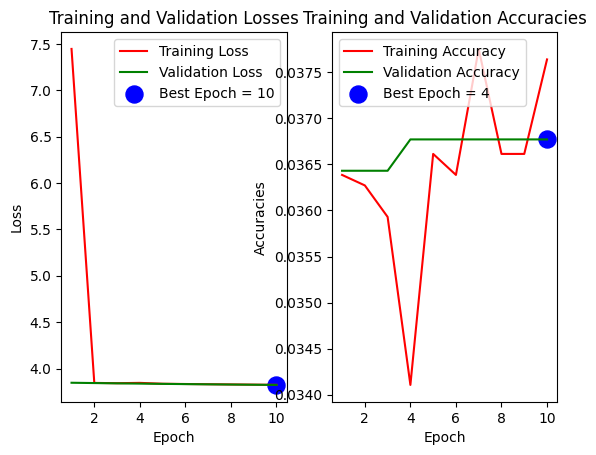

In [16]:
tr_acc=history.history['accuracy']
tr_loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']
index_loss=np.argmin(val_loss)
val_lowest=val_loss[index_loss]
index_acc=np.argmax(val_acc)
acc_highest=val_acc[index_acc]

Epochs=[i+1 for i in range(len(tr_acc))]
loss_label=f"Best Epoch = {str(index_loss+1)}"
acc_label=f"Best Epoch = {str(index_acc+1)}"

#plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(Epochs,tr_loss,'r',label='Training Loss')
plt.plot(Epochs,val_loss,'g',label='Validation Loss')
plt.scatter(index_loss+1,val_lowest,s=150,c='blue',label=loss_label)
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs,tr_acc,'r',label='Training Accuracy')
plt.plot(Epochs,val_acc,'g',label='Validation Accuracy')
plt.scatter(index_loss+1,acc_highest,s=150,c='blue',label=acc_label)
plt.title("Training and Validation Accuracies")
plt.xlabel("Epoch")
plt.ylabel('Accuracies')
plt.legend()
plt.show()



In [17]:
base_model=tf.keras.applications.EfficientNetB4(
    include_top=False,
    input_shape=(224,224,3),
    pooling=max,
)


model=Sequential([
    base_model,
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(47,activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)     │ (None, 7, 7, 1792)     │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 87808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    11,239,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 47)             │         3,055 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,924,686 (110.34 MB)

 Trainable params: 28,799,479 (109.86 MB)

 Non-trainable params: 125,207 (489.09 KB)

In [18]:
history=model.fit(train_gen,epochs=10,validation_data=valid_gen,callbacks=[early_stop])

Epoch 1/10


2026-01-29 03:10:06.250930: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 03:10:06.384541: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 03:10:06.627799: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 03:10:06.768692: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 03:10:07.023786: E external/local_xla/xla/stream_

364/548 ━━━━━━━━━━━━━━━━━━━━ 1:01 335ms/step - accuracy: 0.2122 - loss: 3.1503

2026-01-29 03:13:21.423130: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 03:13:21.557299: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 03:13:21.793297: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 03:13:21.933264: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 03:13:22.185154: E external/local_xla/xla/stream_

548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.2906 - loss: 2.8252

2026-01-29 03:16:34.806744: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 03:16:34.939995: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 03:16:35.160814: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 03:16:35.297270: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 03:16:35.531891: E external/local_xla/xla/stream_

548/548 ━━━━━━━━━━━━━━━━━━━━ 482s 633ms/step - accuracy: 0.2909 - loss: 2.8237 - val_accuracy: 0.7794 - val_loss: 0.8146
Epoch 2/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 253s 462ms/step - accuracy: 0.8640 - loss: 0.4801 - val_accuracy: 0.8257 - val_loss: 0.6329
Epoch 3/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 251s 457ms/step - accuracy: 0.9518 - loss: 0.1660 - val_accuracy: 0.8407 - val_loss: 0.6521
Epoch 4/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 248s 452ms/step - accuracy: 0.9653 - loss: 0.1119 - val_accuracy: 0.8372 - val_loss: 0.6823


In [19]:
model.evaluate(test_gen)

182/183 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.8372 - loss: 0.6532

2026-01-29 03:30:26.754800: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 03:30:26.888140: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 03:30:27.114174: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 03:30:27.249085: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-29 03:30:27.481713: E external/local_xla/xla/stream_

183/183 ━━━━━━━━━━━━━━━━━━━━ 78s 423ms/step - accuracy: 0.8372 - loss: 0.6531


[0.6417673230171204, 0.8329904079437256]

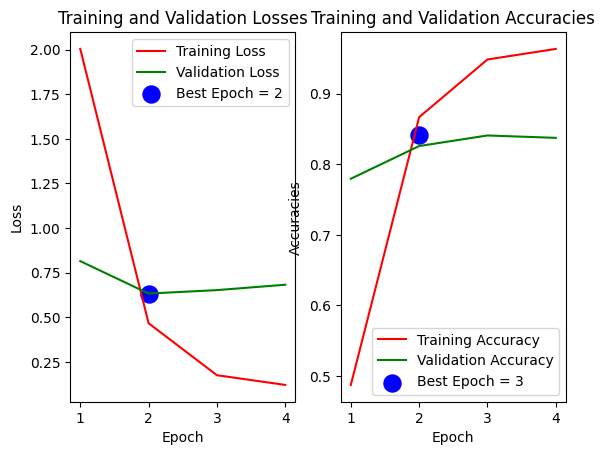

In [20]:
tr_acc=history.history['accuracy']
tr_loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']
index_loss=np.argmin(val_loss)
val_lowest=val_loss[index_loss]
index_acc=np.argmax(val_acc)
acc_highest=val_acc[index_acc]

Epochs=[i+1 for i in range(len(tr_acc))]
loss_label=f"Best Epoch = {str(index_loss+1)}"
acc_label=f"Best Epoch = {str(index_acc+1)}"

#plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(Epochs,tr_loss,'r',label='Training Loss')
plt.plot(Epochs,val_loss,'g',label='Validation Loss')
plt.scatter(index_loss+1,val_lowest,s=150,c='blue',label=loss_label)
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs,tr_acc,'r',label='Training Accuracy')
plt.plot(Epochs,val_acc,'g',label='Validation Accuracy')
plt.scatter(index_loss+1,acc_highest,s=150,c='blue',label=acc_label)
plt.title("Training and Validation Accuracies")
plt.xlabel("Epoch")
plt.ylabel('Accuracies')
plt.legend()
plt.show()



In [21]:
model.save("plant_classifier.h5")

In [22]:
model = tf.keras.models.load_model("plant_classifier.h5")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

# Save TFLite model
with open("plant_classifier.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model saved successfully!")


INFO:tensorflow:Assets written to: /tmp/tmp5diml0qb/assets


INFO:tensorflow:Assets written to: /tmp/tmp5diml0qb/assets


Saved artifact at '/tmp/tmp5diml0qb'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 47), dtype=tf.float32, name=None)
Captures:
  136207931703952: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  136207931708944: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  136207931709136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136207931708368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136207931703376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136207931709904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136207931710480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136207931707984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136207931707600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136207931710288: TensorSpec(shape=(), dtype=tf.resource, name=No

W0000 00:00:1769657465.297755      24 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1769657465.297800      24 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1769657465.706315      24 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled


TFLite model saved successfully!


In [23]:
import shutil

shutil.move("/kaggle/working/plant_classifier.tflite", "/kaggle/working/download_model.tflite")


'/kaggle/working/download_model.tflite'